In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline
print('Libaries implented correctly')

Libaries implented correctly


In [ ]:
df = pd.read_excel('compiled_risk_data.xlsx')
print(df.head())

     project_name                      Smart contract address  \
0  Data Analytics    384571416209d08623c6ace9422613fc8970475d   
1  Data Analytics   0xAb5801a7D398351b8bE11C439e05C5B3259ae9B   
2  Data Analytics  0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db   
3  Data Analytics  0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB   
4  Data Analytics  0x617F2E2fD72FD9D5503197092aC168c91465E7f2   

                                      Blog post link  \
0  https://chainsecurity.com/security-audit/circl...   
1  https://stackoverflow.com/questions/75030483/w...   
2  https://stackoverflow.com/questions/71115106/s...   
3  https://stackoverflow.com/questions/75030483/w...   
4  https://stackoverflow.com/questions/69466137/h...   

                                       Audit website     Chain  \
0                          https://chainsecurity.com  Ethereum   
1  https://studygroup.moralis.io/t/compilation-er...  Ethereum   
2  https://ethereum.stackexchange.com/questions/1...  Ethereum   
3  https

In [ ]:
def phi_coefficient(x, y):
  """Calculate the Phi coefficient for two binary variables."""
  # Create a contingency table
  contingency_table = pd.crosstab(x, y)
  # Calculate the phi coefficient from the contingency table
  chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
  n = np.sum(np.sum(contingency_table))
  phi = np.sqrt(chi2 / n)
  return phi

# Example calculation between two risk tags
phi = phi_coefficient(df['Is_honeypot'], df['anti_whale_modifiable'])
print(f"Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': {phi}")

Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': 0.4437039256424274


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
risk_columns = ['Is_closed_source','hidden_owner', 'anti_whale_modifiable', 'Is_anti_whale','Is_honeypot','buy_tax', 'sell_tax', 'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation', 'bad_contract', 'reusing_state_variable', 'encode_packed_collision' , 'encode_packed_parameters' , 'centralized_risk_medium', 'centralized_risk_high', 'centralized_risk_low', 'event_setter', 'external_dependencies', 'immutable_states', 'reentrancy_without_eth_transfer', 'incorrect_inheritance_order', 'shadowing_local', 'events_maths' ]


In [ ]:
risk_df = df[risk_columns]
phi_matrix = pd.DataFrame(index=risk_df.columns, columns=risk_df.columns)

for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])

print("Phi Coefficencies calculated for all parts of variables")
phi_matrix

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficencies calculated for all parts of variables


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.155005,0.217354,0.222421,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848,0.30473
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.204905,0.332364,0.207183,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793,0.190843
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.231735,0.346207,0.180772,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167,0.303052
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.219838,0.294004,0.199763,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632,0.296332
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.19187,0.224287,0.275755,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523,0.358995
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.239542,0.291784,0.220048,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716,0.290881
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.291278,0.310494,0.23208,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844,0.295159
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.237516,0.329007,0.244272,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881,0.327842
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.157359,0.333584,0.177963,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002,0.296575
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.243507,0.36217,0.216989,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808,0.241693


In [ ]:
phi_matrix = phi_matrix.astype(float)

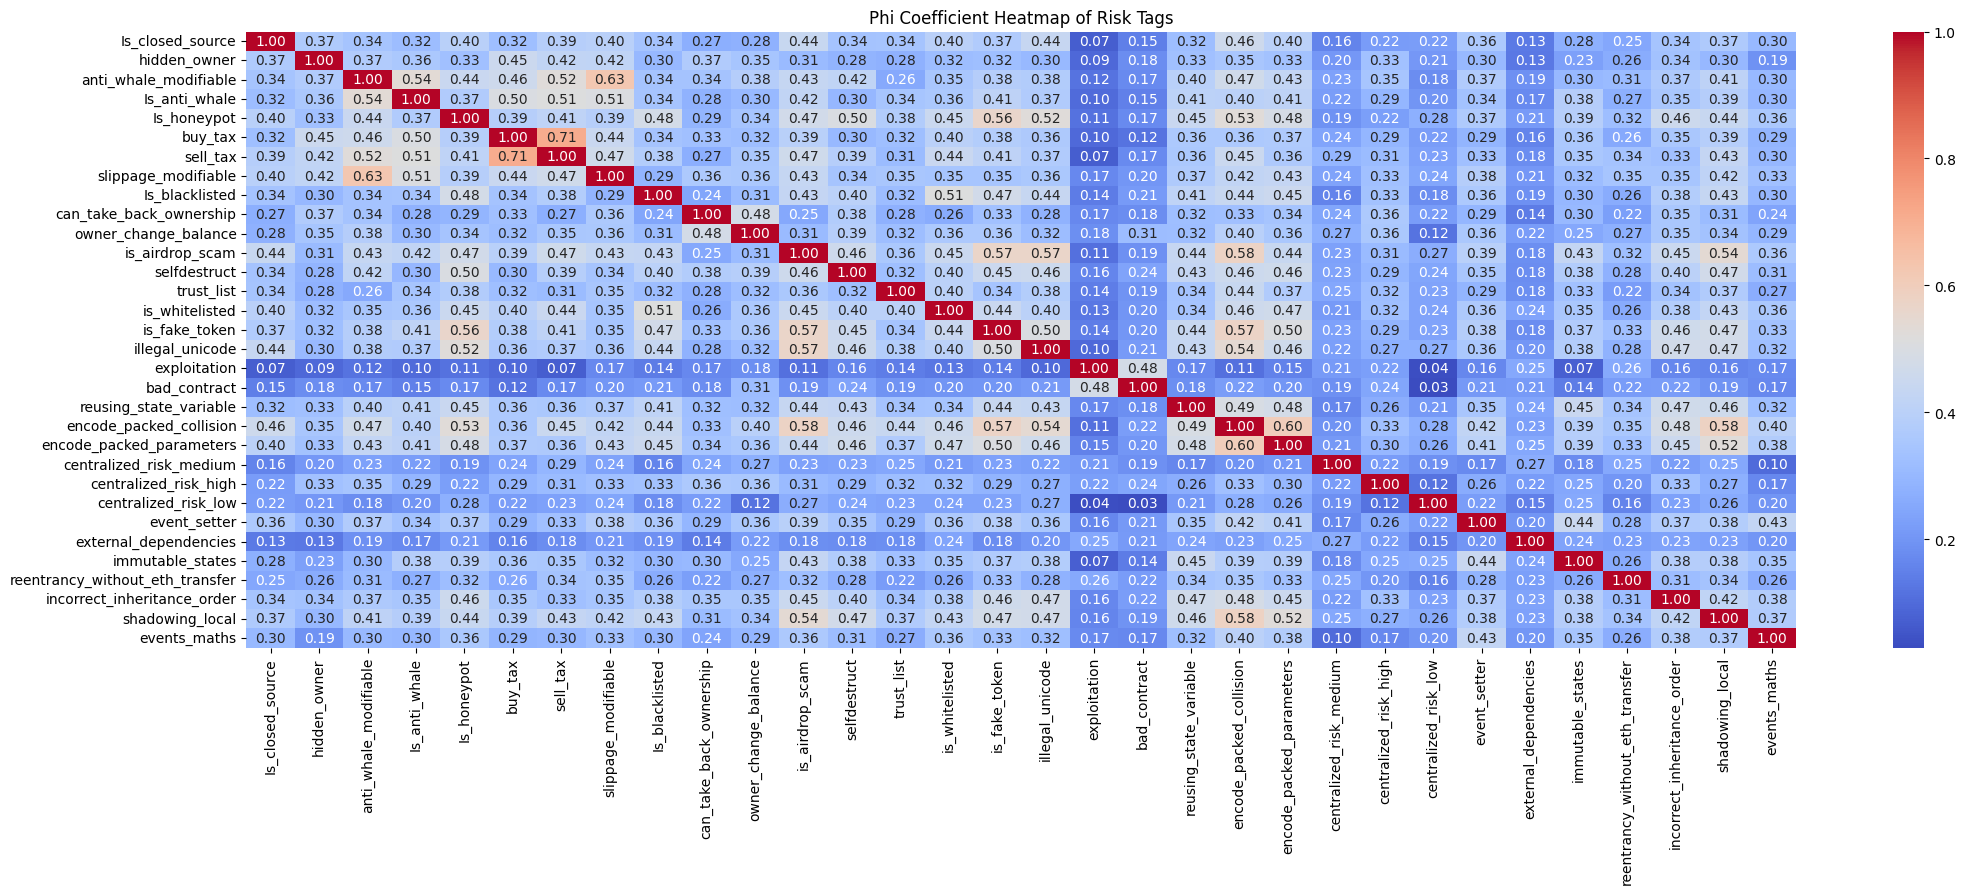

In [ ]:
plt.figure(figsize=(25, 8))
sns.heatmap(phi_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Phi Coefficient Heatmap of Risk Tags')
plt.show()
